In [1]:
import pandas as pd
import os
import requests
import time
import numpy as np

In [2]:
path="D:\\CDS513\\Assignment 1\\Data"
    
os.chdir(path)

# Read csv data file
# Data without feature standardization
#df = pd.read_csv('steam-200k.csv', header=None)
df = pd.read_csv('Data_final_description.csv', header=None)

In [15]:
df.head()

,0,1,2,3,4
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [16]:
df.drop(columns =[4],inplace =True)

In [17]:
df.duplicated().sum()

707

In [18]:
df.shape

(200000, 4)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.columns = [
    'User-id',
    'Game-title',
    'Mode',
    'Playtime'
]
df.set_index('User-id', inplace=True)

In [21]:
df.head()

,Game-title,Mode,Playtime
User-id,,,
151603712,The Elder Scrolls V Skyrim,purchase,1.0
151603712,The Elder Scrolls V Skyrim,play,273.0
151603712,Fallout 4,purchase,1.0
151603712,Fallout 4,play,87.0
151603712,Spore,purchase,1.0


In [22]:
df.nunique()

Game-title    5155
Mode             2
Playtime      1593
dtype: int64

In [23]:
df['Mode'].value_counts()

purchase    128804
play         70489
Name: Mode, dtype: int64

<Axes: >

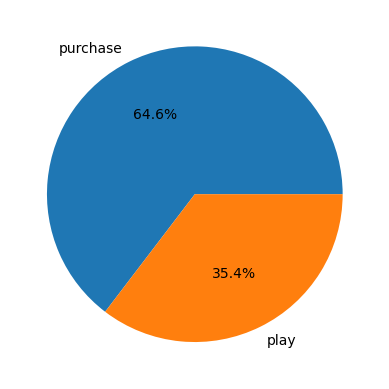

In [24]:
df['Mode'].value_counts().plot(kind ='pie',autopct = '%1.1f%%', ylabel="")

<Axes: >

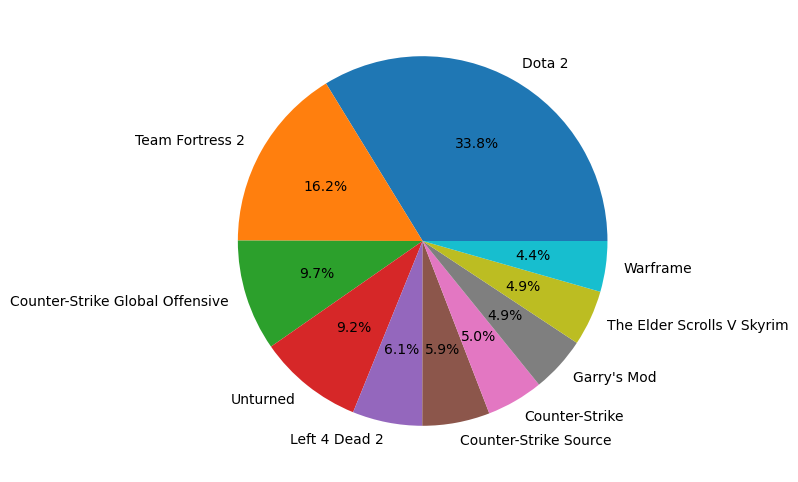

In [25]:
df['Game-title'].value_counts().head(10).plot(kind = 'pie',figsize =(10,6), autopct = '%1.1f%%', ylabel="")

In [26]:
# Pivot the DataFrame to transform 'purchase' and 'play' modes into separate columns
pivot_df = df.pivot_table(index=['User-id', 'Game-title'], columns='Mode', values='Playtime', fill_value=0)

# Reset the index to turn multi-index into columns
pivot_df = pivot_df.reset_index()

# Rename columns for clarity
pivot_df.columns = ['User-id', 'Game-title', 'Playtime', 'Purchase']

# Display the transformed DataFrame
pivot_df.head()


,User-id,Game-title,Playtime,Purchase
0,5250,Alien Swarm,4.9,1
1,5250,Cities Skylines,144.0,1
2,5250,Counter-Strike,0.0,1
3,5250,Counter-Strike Source,0.0,1
4,5250,Day of Defeat,0.0,1


In [6]:
path="D:\\CDS513\\Assignment 1\\Data"
    
os.chdir(path)

# Read csv data file
# Data without feature standardization
pivot_df = pd.read_csv('Data_final_description.csv')
pivot_df

,User-id,Game-title,Genre,personal-rating,description
0,5250,Alien Swarm,Shooter,3,Alien Swarm is a game and Source SDK release f...
1,975449,Alien Swarm,Shooter,5,Alien Swarm is a game and Source SDK release f...
2,1950243,Alien Swarm,Shooter,3,Alien Swarm is a game and Source SDK release f...
3,2259650,Alien Swarm,Shooter,2,Alien Swarm is a game and Source SDK release f...
4,2753525,Alien Swarm,Shooter,2,Alien Swarm is a game and Source SDK release f...
...,...,...,...,...,...
42534,287824954,Close Your Eyes,Puzzle,5,Close Your Eyes is a puzzle horror game where ...
42535,293303005,All Is Dust,Role-playing (RPG),5,Dust off the vacuum and tidy up with The Sims ...
42536,300248088,Sigils of Elohim,Puzzle,5,"As if awakening from a deep sleep, you find yo..."
42537,306839937,Secret Files Tunguska,Point-and-click,5,Unravel one of the greatest mysteries of our t...


# Getting Additional Info for each Game-title

In [159]:
# IGDB API endpoint for games
url = 'https://api.igdb.com/v4/games'
client_id = 'sxiuj4y04yliue4d66h7dkoxt3sjjf'
access_token = '8uip3idw0uhbajgw8xsjw82k00fbvh'
headers = {
    'Client-ID': client_id,
    'Authorization': f'Bearer {access_token}',
    'Accept': 'application/json'
}

In [160]:
def search_games(titles, batch_size=600):
    # Prepare to collect genres and descriptions
    genres_dict = {}

    # Process in batches to manage API request volume
    for i in range(0, len(titles), batch_size):
        batch_titles = titles[i:i+batch_size]
        # Constructing the body for multiple searches can be complex because IGDB API may not support multiple searches in one request.
        # Here we handle them one by one in a batch loop for demonstration.
        for title in batch_titles:
            body = f'search "{title}"; fields name, genres.name, summary; limit 100;'
            response = requests.post(url, headers=headers, data=body)
            if response.status_code == 200:
                data = response.json()
                if data:
                    game_info = {
                        'genre': data[0]['genres'][0]['name'] if 'genres' in data[0] and data[0]['genres'] else 'Genre not found',
                        'summary': data[0]['summary'] if 'summary' in data[0] else 'Summary not found'
                    }
                    genres_dict[title] = game_info
                else:
                    genres_dict[title] = {'genre': 'Genre not found', 'summary': 'Summary not found'}
            else:
                print(f'API request failed with status code {response.status_code}')
            time.sleep(1)  # Sleep to respect API rate limit
            
    return genres_dict

In [161]:
#game_titles = pivot_df['Game-title'].unique().tolist()
game_titles = ["DOTA 2"]
print(game_titles, "\n\nNumber of unique Game-titles:", np.count_nonzero(game_titles))

['DOTA 2'] 

Number of unique Game-titles: 1


In [162]:
genres_info = search_games(game_titles)
print(genres_info)

{'DOTA 2': {'genre': 'Strategy', 'summary': 'Dota 2 is a multiplayer online battle arena video game and the stand-alone sequel to the Defense of the Ancients (DotA) mod. With regular updates that ensure a constant evolution of gameplay, features, and heroes, Dota 2 has taken on a life of its own.'}}


In [80]:
# Convert the dictionary to a DataFrame
game_info_df = pd.DataFrame.from_dict(genres_info, orient='index')

# Reset the index to turn the game titles into a column
game_info_df.reset_index(inplace=True)

# Rename the columns
game_info_df.rename(columns={'index': 'Game-title'}, inplace=True)

game_info_df

,Game-title,Publisher
3,Portal 2: In Motion,Publisher not found
10,Counter-Strike Global Offensive,Publisher not found
33,Borderlands 2,Publisher not found
36,Bulletstorm: Duke Nukem's Bulletstorm Tour,Publisher not found
41,Dark Souls Prepare to Die Edition,Publisher not found
...,...,...
2595,The Settlers Online,Publisher not found
2596,Nobunaga's Ambition: Kakushin with Power Up Kit,Publisher not found
2599,Bargain Basement,Publisher not found
2601,Metal War Online: Retribution,Publisher not found


In [ ]:
nan_summary_games = game_info_df[game_info_df['summary'].isna()]
print(f"Number of missing values in 'summary': {nan_summary_games}")

In [137]:
Final_info_df = pd.merge(pivot_df, merged_df, on='Game-title', how='left')
Final_info_df = Final_info_df.drop(columns=['genre'])

,Game-title,Publisher
151,Cities Skylines,Publisher not available
253,Deus Ex Human Revolution,Publisher not available
355,Portal 2,Publisher not available
743,Age of Empires II HD Edition,Publisher not available
907,Call of Duty Black Ops,Publisher not available
...,...,...
43052,Basement,Publisher not available
43054,Metal War Online Retribution,Publisher not available
43058,Cossacks European Wars,Publisher not available
43060,All Is Dust,Publisher not available


In [125]:
Final_info_df.to_csv("Data_final_description.csv")

# Deriving Ratings

In [89]:
df = pd.read_csv("cleaned_df.csv")

In [90]:
df.head()

,User-id,Game-title,Playtime,Genre
0,5250,Alien Swarm,4.9,Shooter
1,5250,Cities Skylines,144.0,Simulator
2,5250,Counter-Strike,0.0,Shooter
3,5250,Counter-Strike Source,0.0,Shooter
4,5250,Day of Defeat,0.0,Shooter


In [91]:
# purging game library that has less than 2 hours
df= df[(df['Playtime']>=2)]

In [92]:
df

,User-id,Game-title,Playtime,Genre
0,5250,Alien Swarm,4.9,Shooter
1,5250,Cities Skylines,144.0,Simulator
6,5250,Deus Ex Human Revolution,62.0,Shooter
17,5250,Portal 2,13.6,Shooter
20,76767,Age of Empires II HD Edition,13.1,Real Time Strategy (RTS)
...,...,...,...,...
114706,309404240,Mitos.is The Game,2.2,Real Time Strategy (RTS)
114707,309404240,Team Fortress 2,2.2,Shooter
114709,309404240,Unturned,13.0,Shooter
114711,309554670,Mitos.is The Game,5.9,Real Time Strategy (RTS)


In [93]:
df['Game-title'].nunique()

2611

In [94]:
avg_playtime = df.groupby(['Game-title'],as_index = False).Playtime.mean()
avg_playtime['avg_playtime'] = avg_playtime['Playtime']
avg_playtime.drop(columns ='Playtime',inplace = True )

In [95]:
avg_playtime.head()

,Game-title,avg_playtime
0,1... 2... 3... KICK IT! (Drop That Beat Like a...,6.20
1,10 Second Ninja,5.40
2,"10,000,000",3.60
3,100% Orange Juice,17.90
4,12 Labours of Hercules,5.75


In [96]:
df = df.merge(avg_playtime, on='Game-title')

In [97]:
df.head()

,User-id,Game-title,Playtime,Genre,avg_playtime
0,5250,Alien Swarm,4.9,Shooter,9.311921
1,975449,Alien Swarm,9.8,Shooter,9.311921
2,1950243,Alien Swarm,3.8,Shooter,9.311921
3,2259650,Alien Swarm,3.2,Shooter,9.311921
4,2753525,Alien Swarm,3.2,Shooter,9.311921


In [98]:
def assign_rating(row):
    ratios = row['Playtime'] / row['avg_playtime']
    if ratios >= 0.8:
        return 5
    elif ratios >= 0.6:
        return 4
    elif ratios >= 0.4:
        return 3
    elif ratios >= 0.2:
        return 2
    else:
        return 1

In [99]:
df['personal-rating'] = df.apply(assign_rating, axis=1)

In [100]:
df

,User-id,Game-title,Playtime,Genre,avg_playtime,personal-rating
0,5250,Alien Swarm,4.9,Shooter,9.311921,3
1,975449,Alien Swarm,9.8,Shooter,9.311921,5
2,1950243,Alien Swarm,3.8,Shooter,9.311921,3
3,2259650,Alien Swarm,3.2,Shooter,9.311921,2
4,2753525,Alien Swarm,3.2,Shooter,9.311921,2
...,...,...,...,...,...,...
42534,287824954,Close Your Eyes,2.2,Puzzle,2.200000,5
42535,293303005,All Is Dust,5.1,Role-playing (RPG),5.100000,5
42536,300248088,Sigils of Elohim,888.0,Puzzle,888.000000,5
42537,306839937,Secret Files Tunguska,7.9,Point-and-click,7.900000,5


In [101]:
df.drop(columns=['Playtime', 'avg_playtime'], inplace=True)

In [102]:
df

,User-id,Game-title,Genre,personal-rating
0,5250,Alien Swarm,Shooter,3
1,975449,Alien Swarm,Shooter,5
2,1950243,Alien Swarm,Shooter,3
3,2259650,Alien Swarm,Shooter,2
4,2753525,Alien Swarm,Shooter,2
...,...,...,...,...
42534,287824954,Close Your Eyes,Puzzle,5
42535,293303005,All Is Dust,Role-playing (RPG),5
42536,300248088,Sigils of Elohim,Puzzle,5
42537,306839937,Secret Files Tunguska,Point-and-click,5


In [105]:
df.to_csv("Data_final.csv", index=False)